In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
#Cargamos los datos
events = pd.read_csv('C:\\Users\\dev\\repos\\fiuba\\tp1_anlisis_exploratorio\\events.csv', low_memory = False)

In [3]:
#Cabecera
events.head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Info
events.count()

timestamp                   1011288
event                       1011288
person                      1011288
url                           82756
sku                          563838
model                        564284
condition                    563836
storage                      563836
color                        563836
skus                         221699
search_term                   48967
staticpage                     3598
campaign_source               82796
search_engine                 50957
channel                       87378
new_vs_returning              87378
city                          87378
region                        87378
country                       87378
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [5]:
#Resumen
events.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [6]:
#convierto los tipos
events.timestamp = pd.to_datetime(events['timestamp'],format='%Y-%m-%d %H:%M:%S')
events.event = events.event.astype('category')
events.model = events.model.astype('category')
events.storage = events.storage.astype('category')
events.campaign_source = events.campaign_source.astype('category')
events.search_engine = events.search_engine.astype('category')
events.channel = events.channel.astype('category')
events.condition = events.condition.astype('category')
events.new_vs_returning = events.new_vs_returning.astype('category')
events.color = events.color.astype('category')
events.city = events.city.astype('category')
events.region = events.region.astype('category')
events.country = events.country.astype('category')
#descarto las que no me interesan
events.drop(columns=['url','staticpage','skus','device_type','browser_version','operating_system_version','screen_resolution'],inplace=True)
events.dtypes

timestamp           datetime64[ns]
event                     category
person                      object
sku                         object
model                     category
condition                 category
storage                   category
color                     category
search_term                 object
campaign_source           category
search_engine             category
channel                   category
new_vs_returning          category
city                      category
region                    category
country                   category
dtype: object

In [7]:
#separo el datetime
events['year'] = events.timestamp.dt.year
events['month'] = events.timestamp.dt.month
events['day'] = events.timestamp.dt.day
events['hour'] = events.timestamp.dt.hour
events['minute'] = events.timestamp.dt.minute

events.sort_values(by='timestamp',inplace=True,ascending=True)
events.head(1)
#primer evento

,timestamp,event,person,sku,model,condition,storage,color,search_term,campaign_source,...,channel,new_vs_returning,city,region,country,year,month,day,hour,minute
571673,2018-01-01 07:32:26,ad campaign hit,9250d410,NaN,NaN,NaN,NaN,NaN,NaN,google,...,NaN,NaN,NaN,NaN,NaN,2018,1,1,7,32


In [8]:
#ultimo evento
events.tail(1)

,timestamp,event,person,sku,model,condition,storage,color,search_term,campaign_source,...,channel,new_vs_returning,city,region,country,year,month,day,hour,minute
122447,2018-06-15 23:59:31,checkout,208473cf,1325.0,iPhone 6,Excelente,64GB,Prateado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,6,15,23,59


In [9]:
#paso el timestamp a datetimeindex
events.set_index(pd.DatetimeIndex(events.timestamp),inplace=True)

In [10]:
#cantidad de eventos simultaneos -> me parece muy alto esto...revisar
events.index.duplicated().sum()

217483

In [11]:
#descarto hasta el 16-1 para emparejar y poder analizar por dia del mes
filtro = events[(events.index > '2018-01-16 00:00:00')]

In [12]:
#armo la tabla por evento por dia
per_event_daycount = filtro.groupby(['event','day']).agg({'day':'count'}).unstack()
per_event_daycount.columns = per_event_daycount.columns.droplevel(0)
per_event_daycount

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,2618,2626,2629,3059,3254,3025,2958,2805,2654,2543,...,2703,2502,2279,2285,2055,2234,2409,2630,2591,2142
brand listing,2596,3207,3012,3489,4385,3687,3789,3296,3212,3139,...,3153,3174,2566,2307,2485,2570,2868,2952,3294,2167
checkout,1049,1035,963,1260,1372,1307,1221,1172,1034,961,...,1019,999,864,886,688,763,906,1215,1161,999
conversion,34,31,44,36,40,39,35,31,60,60,...,37,34,22,23,38,38,24,35,44,21
generic listing,2062,2183,2095,2374,2538,2534,2647,2255,2187,2230,...,2032,1960,1600,1790,1661,1874,1987,2073,2167,1589
lead,11,18,17,25,15,11,20,10,23,11,...,7,12,6,10,11,11,7,13,16,6
search engine hit,1673,1723,1548,1794,2060,1800,1781,1645,1728,1535,...,1666,1432,1333,1331,1166,1379,1508,1608,1626,1256
searched products,1740,1638,1762,1951,2247,2174,1941,1922,1748,2044,...,1607,1622,1374,1517,1321,1506,1523,1699,1783,1485
staticpage,86,92,142,120,148,135,136,114,131,115,...,100,105,118,126,121,90,80,98,90,59


In [13]:
per_event_daycount.describe()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,"2,814.09","2,985.36","2,880.09","3,314.45","3,673.73","3,319.27","3,398.36","3,046.55","2,950.45","2,973.27",...,"2,800.91","2,690.09","2,396.64","2,408.45","2,345.73","2,386.64","2,762.18","2,959.09","3,043.73","2,152.73"
std,"4,624.04","4,951.61","4,727.65","5,410.37","5,922.63","5,264.54","5,573.07","4,868.26","4,750.40","4,892.63",...,"4,438.88","4,251.84","3,896.85","3,897.15","3,969.60","3,807.75","4,666.11","4,935.96","5,075.35","3,356.82"
min,11.00,18.00,17.00,25.00,15.00,11.00,20.00,10.00,23.00,11.00,...,7.00,12.00,6.00,10.00,11.00,11.00,7.00,13.00,16.00,6.00
25%,567.50,563.50,552.50,690.00,760.00,721.00,678.50,643.00,582.50,538.00,...,559.50,552.00,491.00,506.00,404.50,426.50,493.00,656.50,625.50,529.00
50%,"1,740.00","1,723.00","1,762.00","1,951.00","2,247.00","2,174.00","1,941.00","1,922.00","1,748.00","2,044.00",...,"1,666.00","1,622.00","1,374.00","1,517.00","1,321.00","1,506.00","1,523.00","1,699.00","1,783.00","1,485.00"
75%,"2,607.00","2,697.00","2,674.50","3,117.50","3,309.50","3,059.50","3,040.50","2,893.50","2,737.00","2,640.00",...,"2,719.50","2,587.00","2,338.50","2,296.00","2,150.50","2,254.50","2,501.50","2,689.00","2,671.00","2,068.00"
max,"16,399.00","17,518.00","16,749.00","19,175.00","20,987.00","18,706.00","19,731.00","17,280.00","16,858.00","17,331.00",...,"15,750.00","15,079.00","13,803.00","13,834.00","14,011.00","13,513.00","16,478.00","17,479.00","17,958.00","11,962.00"


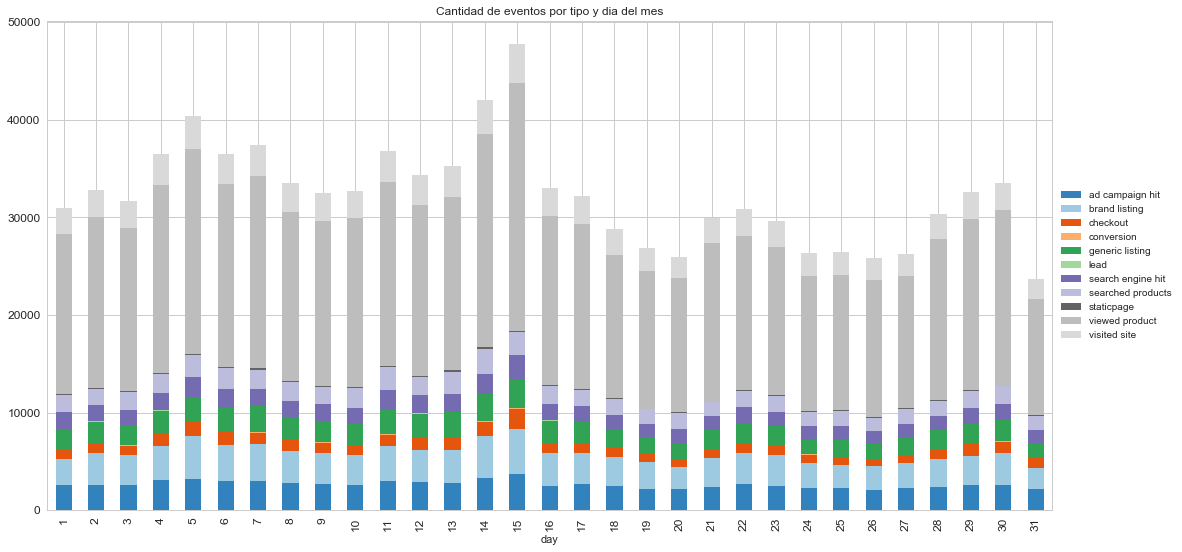

In [14]:
graph = per_event_daycount.transpose().plot.bar(stacked=True,figsize=(18,9),fontsize=12,colormap='tab20c')
plt.title('Cantidad de eventos por tipo y dia del mes')
graph.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
#me gustaria que cada columna este ordenada de mayor a menor

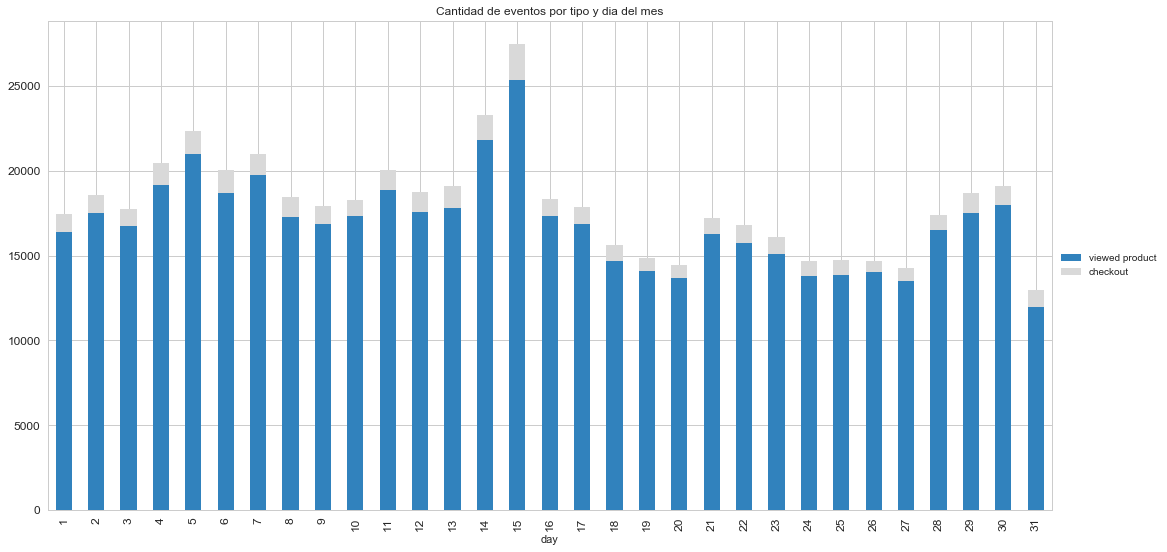

In [15]:
#Comparo dia a dia los eventos ['viewed product','checkout'] :
graph = per_event_daycount.transpose()[['viewed product','checkout']].plot.bar(stacked=True,figsize=(18,9),fontsize=12,colormap='tab20c')
plt.title('Cantidad de eventos por tipo y dia del mes')
graph.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
#estaria bueno agregarle la relacion en cada barra, parece casi constante -> no habria un dia que sean mas efectivos

In [54]:
#cantidad de eventos cada dia (total periodo)
events['date'] = events.index.date
events.head(1)
per_date = events.groupby('date').agg({'date':'count'})
per_date.columns = ['date_count']
per_date.describe()

,date_count
count,166.00
mean,"6,092.10"
std,"7,220.28"
min,29.00
25%,839.00
50%,"2,661.50"
75%,"7,794.50"
max,"25,797.00"


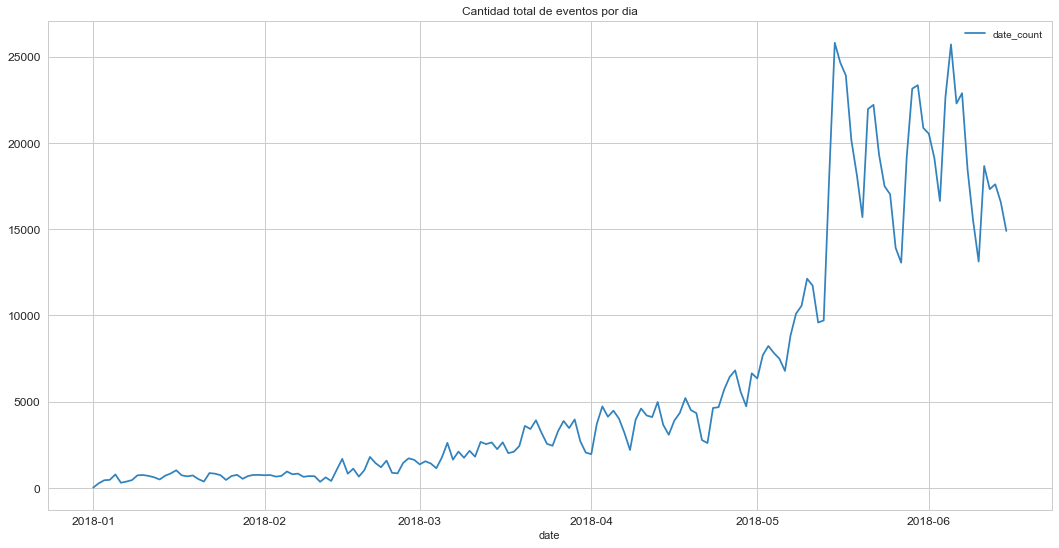

In [56]:
graph = per_date.plot(figsize=(18,9),fontsize=12,colormap='tab20c')
plt.title('Cantidad total de eventos por dia')
#graph.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [137]:
per_event_and_date= events.groupby(['event','date']).agg({'date':'count'}).unstack(fill_value=0)
per_event_and_date.columns = per_event_and_date.columns.droplevel(0)
per_event_and_date

date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,5,20,34,43,48,21,50,48,71,50,...,1839,1805,1585,1261,1060,1405,1373,1432,1333,1193
brand listing,0,45,76,51,79,19,35,44,41,33,...,2087,2190,1667,1267,1035,1671,1500,1529,1466,1442
checkout,0,5,3,9,8,7,11,12,19,16,...,1078,1001,932,778,633,908,920,996,1031,988
conversion,0,0,0,2,3,0,2,3,3,6,...,13,13,4,5,3,7,7,4,9,9
generic listing,6,36,15,29,38,24,27,45,46,57,...,1398,1454,1164,954,876,1277,1148,1206,1014,873
lead,0,0,1,0,0,0,0,1,1,0,...,7,12,5,8,2,9,6,0,8,4
search engine hit,2,20,23,24,27,11,22,18,26,19,...,1112,1108,973,929,750,1139,1014,1011,873,789
searched products,3,10,5,33,24,19,18,28,26,57,...,1342,1173,994,892,1050,1148,850,1123,1040,722
staticpage,0,0,4,0,3,0,2,1,10,11,...,53,63,42,21,24,48,55,53,39,29


In [138]:
checkout_por_dia = per_event_and_date.loc['checkout',:]
checkout_por_dia.describe()
checkout_por_dia.head()

date
2018-01-01    0
2018-01-02    5
2018-01-03    3
2018-01-04    9
2018-01-05    8
Name: checkout, dtype: int64

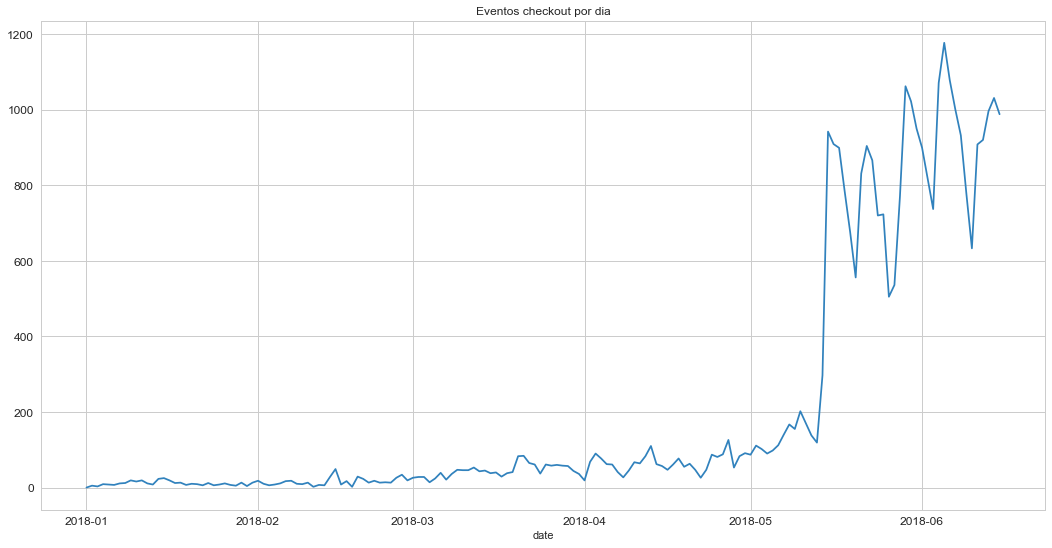

In [139]:
graph = checkout_por_dia.plot(figsize=(18,9),fontsize=12,colormap='tab20c')
plt.title('Eventos checkout por dia')
plt.show()

In [133]:
#por semana
events['week'] = events.index.weekofyear
per_event_and_week = events.groupby(['event','week']).agg({'week':'count'}).unstack(fill_value=0)
per_event_and_week.columns = per_event_and_week.columns.droplevel(0)
per_event_and_week

week,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,221,406,406,471,463,421,572,670,958,1331,...,2480,2514,3051,3951,5535,11463,10382,11912,11487,6736
brand listing,305,360,379,649,588,612,631,1005,1195,1692,...,3666,3291,4167,5183,7188,13828,11791,12287,12652,7608
checkout,43,108,95,55,72,80,117,123,175,259,...,488,376,565,691,1091,5064,5085,6259,6670,4843
conversion,7,20,14,11,26,18,8,21,28,50,...,65,72,87,78,140,88,27,49,53,36
generic listing,175,395,450,455,503,365,480,579,764,1094,...,2235,2360,2714,3458,5172,9165,7715,8961,8754,5518
lead,1,6,8,12,10,1,8,2,9,17,...,55,38,8,9,20,28,21,30,54,27
search engine hit,129,198,245,299,290,232,330,380,506,646,...,1202,1267,1581,2304,3288,7631,6814,7669,7453,4826
searched products,112,236,345,505,335,252,439,349,555,623,...,1321,1477,1959,2543,4576,8385,6552,7637,8280,4883
staticpage,9,37,49,29,25,23,25,28,37,105,...,125,100,283,179,333,507,297,376,358,224


In [134]:
per_event_and_week.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', name='week')

In [135]:
per_event_and_week.describe()

week,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,246.36,408.82,447.09,447.45,462.36,453.55,581.64,802.00,937.27,"1,261.73",...,"2,601.18","2,519.27","3,507.36","4,640.00","6,605.27","13,311.82","11,360.09","12,980.18","12,779.36","7,730.73"
std,428.00,641.47,655.64,525.80,608.60,683.44,892.81,"1,389.89","1,423.55","1,896.36",...,"4,018.99","3,753.51","5,883.66","8,047.36","11,015.36","22,024.67","18,526.49","21,429.97","20,704.45","12,227.55"
min,1.00,6.00,8.00,11.00,10.00,1.00,8.00,2.00,9.00,17.00,...,55.00,38.00,8.00,9.00,20.00,28.00,21.00,30.00,53.00,27.00
25%,26.00,72.50,72.00,42.00,49.00,51.50,71.00,75.50,106.00,182.00,...,306.50,238.00,424.00,435.00,712.00,"2,785.50","2,691.00","3,317.50","3,514.00","2,525.00"
50%,129.00,236.00,345.00,455.00,335.00,252.00,439.00,380.00,555.00,646.00,...,"1,321.00","1,477.00","1,959.00","2,543.00","4,576.00","8,385.00","6,814.00","7,669.00","8,280.00","4,883.00"
75%,214.00,400.50,428.00,545.00,545.50,500.00,596.00,734.50,"1,006.00","1,346.00",...,"2,659.50","2,748.50","3,255.50","4,169.00","5,999.50","11,850.00","10,471.00","11,735.50","11,337.00","6,724.00"
max,"1,501.00","2,278.00","2,333.00","1,851.00","2,159.00","2,406.00","3,168.00","4,866.00","5,029.00","6,701.00",...,"14,137.00","13,234.00","20,706.00","28,257.00","38,851.00","78,034.00","65,717.00","76,043.00","73,625.00","43,625.00"


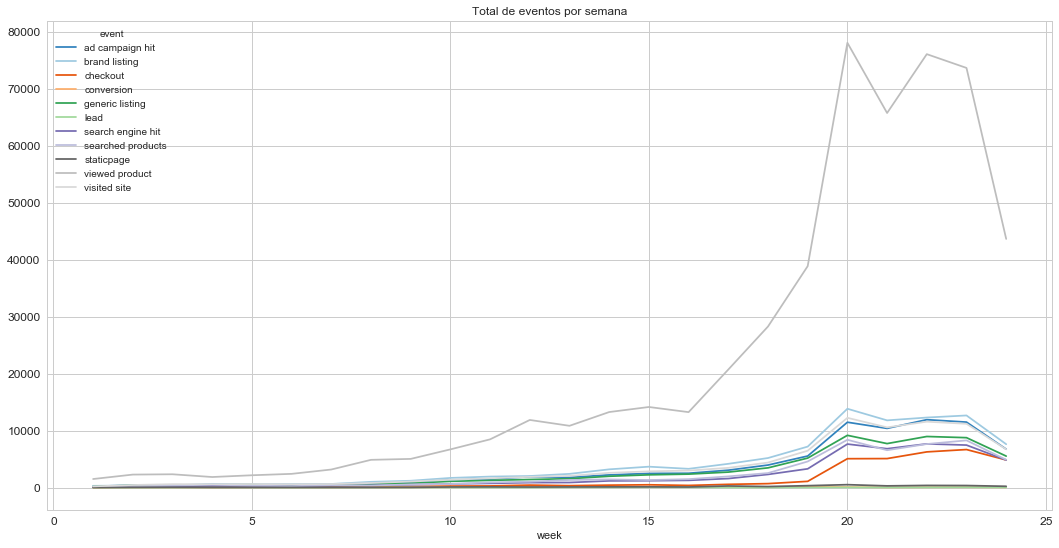

In [136]:
graph = per_event_and_week.transpose().plot(figsize=(18,9),fontsize=12,colormap='tab20c',x_compat=True)
plt.title('Total de eventos por semana')
plt.show()

In [ ]:
#cantidad de eventos por mes (total periodo)
#por dia de la semana y hora (como en el otro notebook) -> y filtrado por evento?